<a href="https://colab.research.google.com/github/tanumay-deb/Covid-19-Detection-from-X-rays-Using-Transfer-Learning/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My\ Drive/CPN Dataset

/content/drive/My Drive/CPN Dataset


In [ ]:
ls

c1.png  c3.png        CPN_Model_VGG16.h5  N2.png  p1.png  p3.png
c2.png  CPN_Model.h5  N1.png              N3.png  p2.png  plot.png


In [ ]:
pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56442 sha256=275fbced0a59577c0abb6e81a067dbad9311ecc166de3025e5c2cee2990e15ae
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


**TRAINING/TESTING MODEL**

In [ ]:
#libraries required to train the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
dataset_dir="/content/drive/My Drive/Dataset/Dataset/CNN-Dataset"

In [ ]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath

/content/drive/My Drive/Dataset/Dataset/CNN-Dataset ['COVID', 'Viral Pneumonia', 'Normal'] []
/content/drive/My Drive/Dataset/Dataset/CNN-Dataset/COVID [] ['COVID-993.png', 'COVID-1007.png', 'COVID-1014.png', 'COVID-997.png', 'COVID-985.png', 'COVID-977.png', 'COVID-1028.png', 'COVID-981.png', 'COVID-1011.png', 'COVID-980.png', 'COVID-1013.png', 'COVID-986.png', 'COVID-998.png', 'COVID-996.png', 'COVID-992.png', 'COVID-1039.png', 'COVID-999.png', 'COVID-994.png', 'COVID-1042.png', 'COVID-1001.png', 'COVID-1025.png', 'COVID-1000.png', 'COVID-987.png', 'COVID-951.png', 'COVID-955.png', 'COVID-973.png', 'COVID-943.png', 'COVID-948.png', 'COVID-937.png', 'COVID-916.png', 'COVID-933.png', 'COVID-923.png', 'COVID-965.png', 'COVID-914.png', 'COVID-938.png', 'COVID-950.png', 'COVID-922.png', 'COVID-949.png', 'COVID-947.png', 'COVID-940.png', 'COVID-966.png', 'COVID-934.png', 'COVID-995.png', 'COVID-969.png', 'COVID-915.png', 'COVID-970.png', 'COVID-926.png', 'COVID-983.png', 'COVID-964.png', '

In [ ]:
#initialize the list of image data and target labels
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid'} #dictionary to map file label name with target label name

In [ ]:
for imgpaths in tqdm(imgpath):  #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 #resizing the image
    

    #updates the respective data and target label lists
    data.append(image)
    target.append(dic[label])

100%|██████████| 9951/9951 [29:14<00:00,  5.67it/s]


In [ ]:
print(len(data)) #to know length of data

9951


In [ ]:
size=[]
for file in imgpath: #for loop to get image paths
    img=plt.imread(file) #used to read an image from a file into an array
    size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
pd.Series(size).value_counts() #it retures a series containing counts of unique values

(299, 299)       9811
(299, 299, 3)     140
dtype: int64

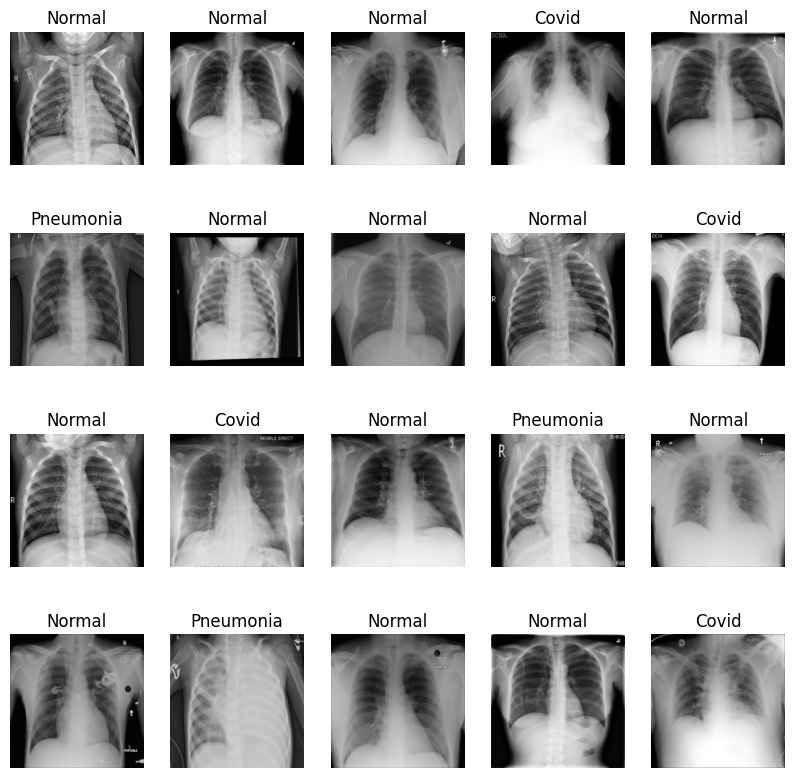

In [ ]:
plt.figure(figsize=(10,10)) #to change the size of the images
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : #enumerate() to get a counter and the value from the iterable at the same time and random.randit() to generate randome images from image path
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [ ]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [ ]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(7960, 150, 150, 3)
(1991, 150, 150, 3)
(7960, 3)
(1991, 3)


In [ ]:
trainX[0]

array([[[0.07058824, 0.07058824, 0.07058824],
        [0.06666667, 0.06666667, 0.06666667],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.09411765, 0.09411765, 0.09411765],
        [0.08627451, 0.08627451, 0.08627451],
        [0.07058824, 0.07058824, 0.07058824],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.05882353, 0.05882353, 0.05882353]],

       ...,

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [ ]:
#compile
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [ ]:
data=[]

In [ ]:
imgpath=[]

In [ ]:
df=[]

In [ ]:
size=[]

In [ ]:
#will train model upto 20 epochs
epochs=20
batch_size=64

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/20
124/124 [==============================] - 54s 425ms/step - loss: 1.1829 - accuracy: 0.7191 - val_loss: 0.3973 - val_accuracy: 0.8311
Epoch 2/20
124/124 [==============================] - 52s 419ms/step - loss: 0.3466 - accuracy: 0.8613 - val_loss: 0.2897 - val_accuracy: 0.8816
Epoch 3/20
124/124 [==============================] - 51s 414ms/step - loss: 0.2737 - accuracy: 0.8967 - val_loss: 0.2718 - val_accuracy: 0.8952
Epoch 4/20
124/124 [==============================] - 51s 411ms/step - loss: 0.2091 - accuracy: 0.9220 - val_loss: 0.2101 - val_accuracy: 0.9244
Epoch 5/20
124/124 [==============================] - 52s 416ms/step - loss: 0.1839 - accuracy: 0.9322 - val_loss: 0.1867 - val_accuracy: 0.9320
Epoch 6/20
124/124 [==============================] - 52s 417ms/step - loss: 0.1521 - accuracy: 0.9440 - val_loss: 0.1987 - val_accuracy: 0.9259
Epoch 7/20
124/124 [==============================] - 51s 412ms/step - loss: 0.1174 - accuracy: 0.9555 - val_loss: 0.1676 - val_ac

In [ ]:
model.save('/content/drive/My Drive/CPN Dataset/CPN_Model1.h5')

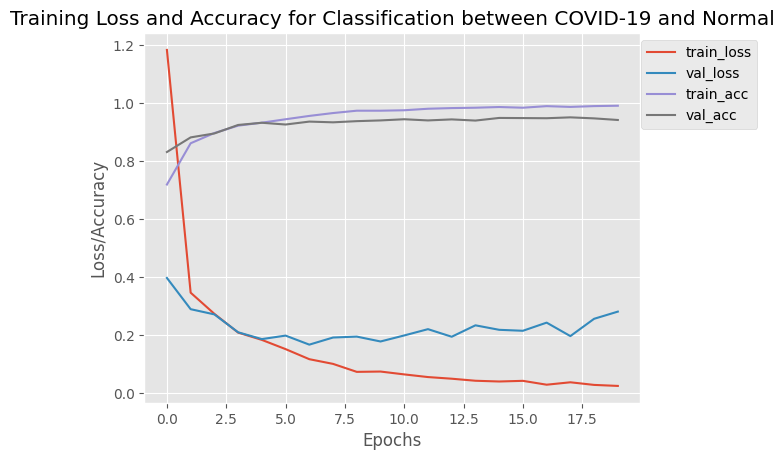

In [ ]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19 and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [ ]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.2808879315853119
Test Accuracy is: 0.9417378306388855


In [ ]:
modelLoss=[]

In [ ]:
modelAccuracy=[]

In [ ]:
#classification report on train
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

125/125 [==============================] - 9s 73ms/step
              precision    recall  f1-score   support

       Covid      0.993     0.999     0.996      2892
      Normal      0.999     0.994     0.997      3992
   Pneumonia      0.998     1.000     0.999      1076

    accuracy                          0.997      7960
   macro avg      0.997     0.998     0.997      7960
weighted avg      0.997     0.997     0.997      7960



In [ ]:
predIdxs=[]

In [ ]:
#classification report on test
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

32/32 [==============================] - 2s 72ms/step
              precision    recall  f1-score   support

       Covid      0.916     0.961     0.938       724
      Normal      0.970     0.923     0.946       998
   Pneumonia      0.915     0.959     0.936       269

    accuracy                          0.942      1991
   macro avg      0.934     0.948     0.940      1991
weighted avg      0.943     0.942     0.942      1991



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[696  21   7]
 [ 60 921  17]
 [  4   7 258]]


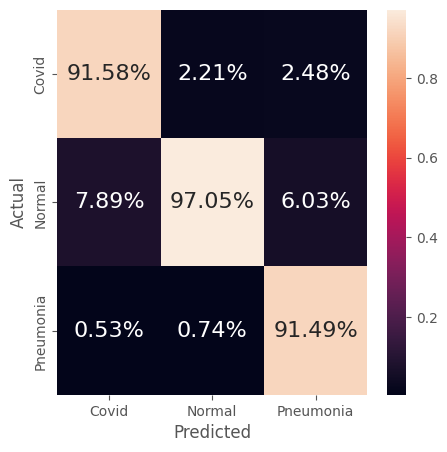

In [ ]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()